In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
subdf = df[['Survived','Pclass','Sex','Age','Fare']]

In [5]:
Sex_dummies=pd.get_dummies(subdf['Sex'])

In [6]:
concat = pd.concat([subdf,Sex_dummies], axis='columns')

In [7]:
concat

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,1
887,1,1,female,19.0,30.0000,1,0
888,0,3,female,NaN,23.4500,1,0
889,1,1,male,26.0,30.0000,0,1


In [8]:
x = concat.drop(['Survived', 'Sex'],axis='columns')

In [9]:
import math
mean = math.floor(df['Age'].mean())
mean

29

In [10]:
x['Age'].fillna(mean,inplace=True)
x

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,29.0,23.4500,1,0
889,1,26.0,30.0000,0,1


In [11]:
y = df.Survived


In [12]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier()

In [53]:
model.fit(X_train,y_train)
clf = model.fit(X_train,y_train)

In [54]:
model.score(X_test,y_test)

0.8324022346368715

In [35]:
X_test

,Pclass,Age,Fare,female,male
455,3,29.0,7.8958,0,1
585,1,18.0,79.6500,1,0
240,3,29.0,14.4542,1,0
467,1,56.0,26.5500,0,1
720,2,6.0,33.0000,1,0
...,...,...,...,...,...
363,3,35.0,7.0500,0,1
345,2,24.0,13.0000,1,0
170,1,61.0,33.5000,0,1
235,3,29.0,7.5500,1,0


In [36]:
y_test

455    1
585    1
240    0
467    0
720    1
      ..
363    0
345    1
170    0
235    0
809    1
Name: Survived, Length: 179, dtype: int64

In [49]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1])

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

Text(50.722222222222214, 0.5, 'Truth')

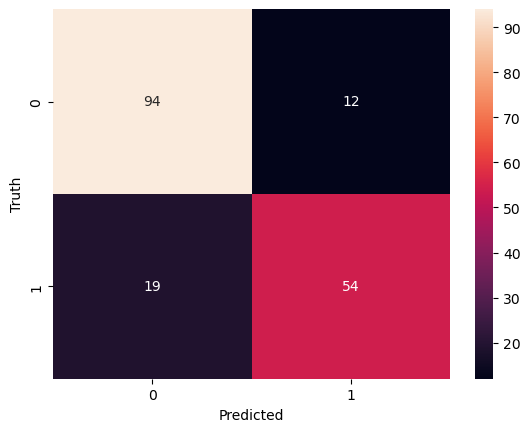

In [48]:
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

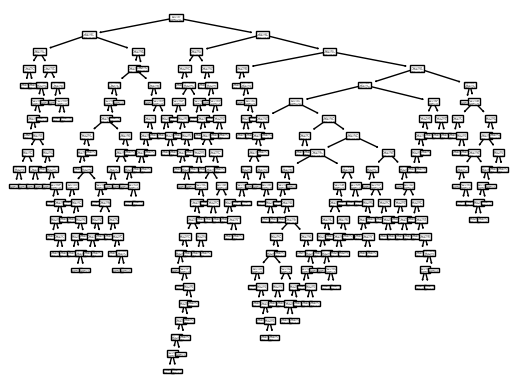

In [56]:
tree.plot_tree(clf)
plt.show()